# 7.1

Circle debug best cost: 6.180339887498949


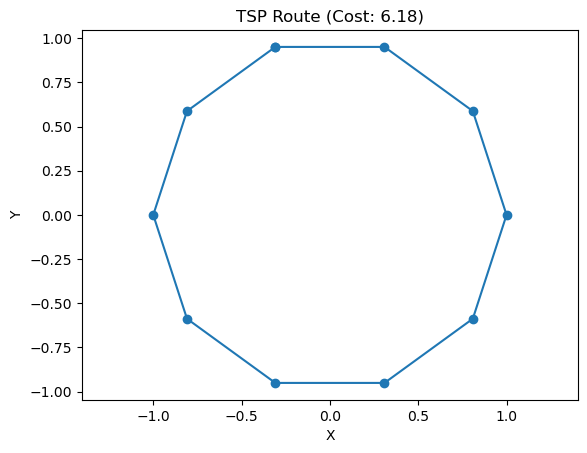

Cost-matrix SA best cost: 1186.0


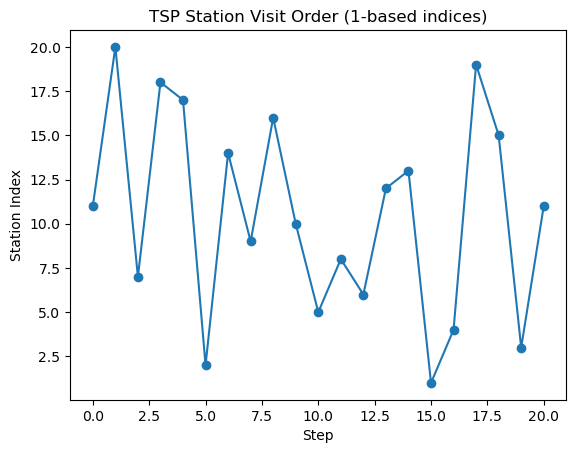

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulated_annealing(cost_matrix, initial_route=None, T0=1.0, cooling='inverse_sqrt', max_iter=10000):
    n = cost_matrix.shape[0]
    if initial_route is None:
        route = np.arange(n)
        np.random.shuffle(route)
    else:
        route = initial_route.copy()
    best_route = route.copy()

    def route_cost(r):
        return sum(cost_matrix[r[i], r[(i + 1) % n]] for i in range(n))

    current_cost = route_cost(route)
    best_cost = current_cost

    for k in range(1, max_iter + 1):
        if cooling == 'inverse_sqrt':
            T = T0 / np.sqrt(1 + k)
        elif cooling == 'log':
            T = -T0 * np.log(1 + k)
        else:
            T = T0 / (1 + k)

        i, j = np.random.choice(n, 2, replace=False)
        new_route = route.copy()
        new_route[i], new_route[j] = new_route[j], new_route[i]
        new_cost = route_cost(new_route)
        delta = new_cost - current_cost

        if delta <= 0 or np.random.rand() < np.exp(-delta / T):
            route = new_route
            current_cost = new_cost
            if current_cost < best_cost:
                best_cost = current_cost
                best_route = route.copy()

    return best_route, best_cost


def plot_route(coords, route):
    x = coords[route, 0]
    y = coords[route, 1]
    x = np.append(x, x[0])
    y = np.append(y, y[0])

    plt.figure()
    plt.plot(x, y, 'o-')
    plt.title(f"TSP Route (Cost: {sum(np.linalg.norm(coords[route[i]] - coords[route[(i+1)%len(route)]]) for i in range(len(route))):.2f})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis('equal')
    plt.show()


if __name__ == "__main__":
    n = 10
    angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
    coords = np.column_stack((np.cos(angles), np.sin(angles)))
    cost_matrix_circle = np.linalg.norm(coords[:, None, :] - coords[None, :, :], axis=2)

    route_circle, cost_circle = simulated_annealing(
        cost_matrix_circle, max_iter=5000, cooling='inverse_sqrt'
    )
    print("Circle debug best cost:", cost_circle)
    plot_route(coords, route_circle)

    cost = np.loadtxt('cost.csv', delimiter=',')
    route_cost_mat, cost_val = simulated_annealing(
        cost, max_iter=20000, cooling='inverse_sqrt'
    )
    print("Cost-matrix SA best cost:", cost_val)

    plt.figure()
    seq = np.append(route_cost_mat, route_cost_mat[0]) + 1 
    plt.plot(range(len(seq)), seq, 'o-')
    plt.title("TSP Station Visit Order (1-based indices)")
    plt.xlabel("Step")
    plt.ylabel("Station Index")
    plt.show()
